# CSIC 5011 - HW5

----
### NGUYEN Huu Canh
### SID: 20818623
----

## Q1. RPCA

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

(CVXPY) Mar 13 02:00:28 PM: Encountered unexpected exception importing solver GLPK:
ImportError("cannot import name 'glpk' from 'cvxopt' (/home/chris/anaconda3/envs/torch/lib/python3.11/site-packages/cvxopt/__init__.py)")
(CVXPY) Mar 13 02:00:28 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError("cannot import name 'glpk' from 'cvxopt' (/home/chris/anaconda3/envs/torch/lib/python3.11/site-packages/cvxopt/__init__.py)")


#### a. Implementation in CXV

In [2]:
m = n = 20
r = 1
p = 0.1

A = np.random.normal(size=(m,n))
u, s, vh = np.linalg.svd(A, full_matrices=False)
L0=0
for i in range(r):
    L0 += np.expand_dims(vh[:,i], axis=1)@np.expand_dims(vh[:,i], axis=0)

S0 = np.where(np.random.random(size=(m, n))>(1-p), 1, 0)
M = L0+S0

In [3]:
ld = 0.25
L = cp.Variable((m, n))
S = cp.Variable((m, n))
W1 = cp.Variable((m, n))
W2 = cp.Variable((m, n))
objective = cp.Minimize(0.5*(cp.trace(W1)+cp.trace(W2)) + ld*cp.sum(cp.abs(S)))
constraints = [L+S>=M-1e-5, L+S<=M+1e-5, cp.bmat([[W1, L],[L.T, W2]]) >> 0]
problem = cp.Problem(objective, constraints)
problem.solve()

print("|S-S0|", np.linalg.norm(S0-S.value))
print("|L-L0|", np.linalg.norm(L0-L.value))

|S-S0| 0.00017279956838164328
|L-L0| 0.0002499818773407146


#### b. *p* varies

In [4]:
number_p = 21
trials = 50

success = np.zeros(number_p)

m = n = 20
r = 1
for p_i, p in enumerate(np.linspace(0,1,number_p)):
    success_count=0
    for _ in range(trials):
        # Set up
        A = np.random.normal(size=(m,n))
        u, s, vh = np.linalg.svd(A, full_matrices=False)
        L0=0
        for i in range(r):
            L0 += np.expand_dims(vh[:,i], axis=1)@np.expand_dims(vh[:,i], axis=0)
        S0 = np.where(np.random.random(size=(m, n))>(1-p), 1, 0)
        M = L0+S0

        # Solve
        L = cp.Variable((m, n))
        S = cp.Variable((m, n))
        W1 = cp.Variable((m, m))
        W2 = cp.Variable((n, n))
        objective = cp.Minimize(0.5*(cp.trace(W1)+cp.trace(W2)) + ld*cp.sum(cp.abs(S)))
        constraints = [L+S>=M-1e-5, L+S<=M+1e-5, cp.bmat([[W1, L],[L.T, W2]]) >> 0]
        problem = cp.Problem(objective, constraints)
        problem.solve()

        if problem.status not in ["infeasible", "unbounded"]:
            if np.linalg.norm(S0-S.value, ord=2) <= 1e-3:
                success_count+=1
    
    success[p_i] = success_count/trials

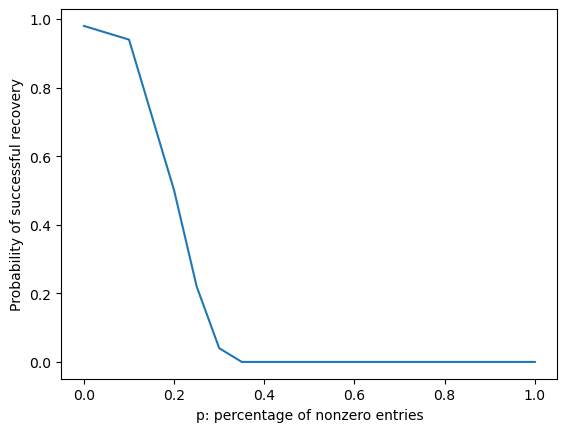

In [5]:
plt.plot(np.linspace(0,1,number_p), success)
plt.xlabel("p: percentage of nonzero entries")
plt.ylabel("Probability of successful recovery")
plt.show()

#### c. *r* varies

In [6]:
trials = 50
success = np.zeros(min(m,n))

m = n = 20
p = 0.1
for r_i, r in enumerate(range(min(m,n))):
    success_count=0
    for _ in range(trials):
        # Set up
        A = np.random.normal(size=(m,n))
        u, s, vh = np.linalg.svd(A, full_matrices=False)
        L0=0
        for i in range(r):
            L0 += np.expand_dims(vh[:,i], axis=1)@np.expand_dims(vh[:,i], axis=0)
        S0 = np.where(np.random.random(size=(m, n))>(1-p), 1, 0)
        M = L0+S0

        # Solve
        L = cp.Variable((m, n))
        S = cp.Variable((m, n))
        W1 = cp.Variable((m, m))
        W2 = cp.Variable((n, n))
        objective = cp.Minimize(0.5*(cp.trace(W1)+cp.trace(W2)) + ld*cp.sum(cp.abs(S)))
        constraints = [L+S>=M-1e-5, L+S<=M+1e-5, cp.bmat([[W1, L],[L.T, W2]]) >> 0]
        problem = cp.Problem(objective, constraints)
        problem.solve()

        if problem.status not in ["infeasible", "unbounded"]:
            if np.linalg.norm(S0-S.value, ord=2) <= 1e-3:
                success_count+=1
    
    success[r_i] = success_count/trials

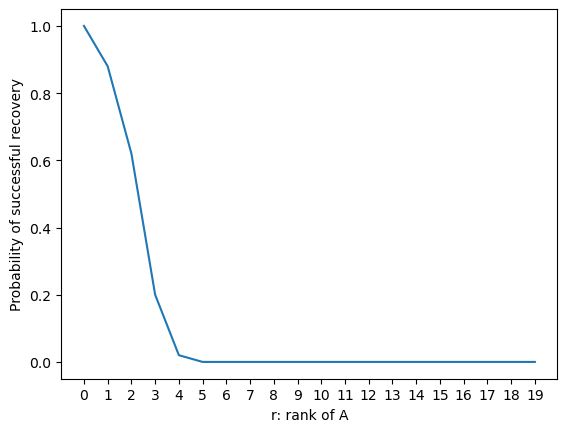

In [7]:
plt.plot(range(min(m,n)), success)
plt.xlabel("r: rank of A")
plt.xticks(list(range(min(m,n))))
plt.ylabel("Probability of successful recovery")
plt.show()

## Q2. SPCA

#### a. Covariance matrix

$$
\begin{bmatrix}
290 & 290 & 290 & 290 & 0 & 0 & 0 & 0 & -87 & -87 \\
290 & 290 & 290 & 290 & 0 & 0 & 0 & 0 & -87 & -87 \\
290 & 290 & 290 & 290 & 0 & 0 & 0 & 0 & -87 & -87 \\
290 & 290 & 290 & 290 & 0 & 0 & 0 & 0 & -87 & -87 \\
0 & 0 & 0 & 0 & 300 & 300 & 300 & 300 & 277.5 & 277.5 \\
0 & 0 & 0 & 0 & 300 & 300 & 300 & 300 & 277.5 & 277.5 \\
0 & 0 & 0 & 0 & 300 & 300 & 300 & 300 & 277.5 & 277.5 \\
0 & 0 & 0 & 0 & 300 & 300 & 300 & 300 & 277.5 & 277.5 \\
-87 & -87 & -87 & -87 & 277.5 & 277.5 & 277.5 & 277.5 & 282.7875 & 282.7875\\
-87 & -87 & -87 & -87 & 277.5 & 277.5 & 277.5 & 277.5 & 282.7875 & 282.7875\\
\end{bmatrix}
$$

In [8]:
n_samples = 2000
obs = np.zeros((n_samples, 10))
for s in range(n_samples):
    v1 = np.random.normal(0,np.sqrt(290))
    v2 = np.random.normal(0,np.sqrt(300))
    v3 = -0.3*v1+0.925*v2
    for i in range(4):
        obs[s, i] = v1 + np.random.normal(0,1)
    
    for i in range(4, 8):  
        obs[s, i] = v2 + np.random.normal(0,1)

    for i in range(8, 10):  
        obs[s, i] = v3 + np.random.normal(0,1)

cov_matrix = np.cov(obs.transpose())
print(cov_matrix)

[[302.75836544 301.89415254 301.41742391 301.74892064  -9.73138081
   -9.54650078 -10.16493247 -10.09295544 -99.38875158 -99.74123841]
 [301.89415254 303.04610141 301.58087443 301.87612444  -9.83659429
   -9.70225675 -10.26956841 -10.18426118 -99.52348165 -99.92510622]
 [301.41742391 301.58087443 302.11342654 301.37092302  -9.90982004
   -9.79104213 -10.45286232 -10.27219994 -99.44260746 -99.90991261]
 [301.74892064 301.87612444 301.37092302 302.77260992  -9.50819867
   -9.3327646   -9.97117807  -9.87816177 -99.12255716 -99.56165366]
 [ -9.73138081  -9.83659429  -9.90982004  -9.50819867 310.6872715
  309.12354979 309.56665562 309.46761842 288.42112681 289.09474328]
 [ -9.54650078  -9.70225675  -9.79104213  -9.3327646  309.12354979
  309.61306751 309.02899733 308.96481882 287.82211173 288.53757452]
 [-10.16493247 -10.26956841 -10.45286232  -9.97117807 309.56665562
  309.02899733 310.36974699 309.36858125 288.41512604 289.10992912]
 [-10.09295544 -10.18426118 -10.27219994  -9.87816177 30

The variance of the three underlying factors is 290, 300, and 283.8, respectively. The numbers of variables associated with the three factors are 4, 4, and 2. Therefore V2 and
V1 are almost equally important, and they are much more important than V3. These facts suggest that we only need to consider two derived variables with “correct” sparse representations.

#### b. Principle components

In [9]:
cov_matrix = [[290,290,290,290,0,0,0,0,-87,-87],
              [290,290,290,290,0,0,0,0,-87,-87],
              [290,290,290,290,0,0,0,0,-87,-87],
              [290,290,290,290,0,0,0,0,-87,-87],
              [0,0,0,0,300,300,300,300,277.5,277.5],
              [0,0,0,0,300,300,300,300,277.5,277.5],
              [0,0,0,0,300,300,300,300,277.5,277.5],
              [0,0,0,0,300,300,300,300,277.5,277.5],
              [-87,-87,-87,-87,277.5,277.5,277.5,277.5,282.7875,282.7875],
              [-87,-87,-87,-87,277.5,277.5,277.5,277.5,282.7875,282.7875]
              ]

u, s, vh = np.linalg.svd(cov_matrix, hermitian=True)
u[:,:4]


array([[-0.11574657, -0.47850213, -0.84893429, -0.13963389],
       [-0.11574657, -0.47850213,  0.44835403, -0.41680183],
       [-0.11574657, -0.47850213,  0.16448031,  0.64064058],
       [-0.11574657, -0.47850213,  0.20234741, -0.11138572],
       [ 0.39546361, -0.14488009,  0.00830987,  0.32839749],
       [ 0.39546361, -0.14488009,  0.00830987,  0.32839749],
       [ 0.39546361, -0.14488009,  0.0437253 , -0.28649365],
       [ 0.39546361, -0.14488009,  0.0437253 , -0.28649365],
       [ 0.40052781,  0.00953655, -0.05625424, -0.04530145],
       [ 0.40052781,  0.00953655, -0.05625424, -0.04530145]])

#### c. SDP problem

In [10]:
ld = 0.0
X = cp.Variable((10, 10), PSD=True)
objective = cp.Maximize(cp.trace(cov_matrix@X) - ld*cp.sum(cp.abs(X)))
constraints = [cp.trace(X) == 1, cp.sum(cp.abs(X)) <= 4]
problem = cp.Problem(objective, constraints)
problem.solve()

w,v = np.linalg.eig(X.value)
x1=v[:,0]
print("First component from Sparse PCA\n", x1)

First component from Sparse PCA
 [-1.24336696e-06 -1.24336703e-06 -1.24336708e-06 -1.24336724e-06
 -5.00000000e-01 -5.00000000e-01 -5.00000000e-01 -5.00000000e-01
  2.64208697e-05  2.64208662e-05]


This is similar to the result of the papers *Sparse Principal Component Analysis* and *A Direct Formulation for Sparse PCA Using Semidefinite Programming*.

Unlike normal PCA, the first component from SPCA explains only 40.9% of the total variance. 

#### d. Remove first and second sparse PCA

In [11]:
cov_matrix_1_remove = cov_matrix - (np.expand_dims(x1, axis=0)@cov_matrix@np.expand_dims(x1, axis=1))*np.expand_dims(x1, axis=1)@np.expand_dims(x1, axis=0)
X = cp.Variable((10, 10), PSD=True)
objective = cp.Maximize(cp.trace(cov_matrix_1_remove@X) - ld*cp.sum(cp.abs(X)))
constraints = [cp.trace(X) == 1, cp.sum(cp.abs(X)) <= 4]
problem = cp.Problem(objective, constraints)
problem.solve()

w,v = np.linalg.eig(X.value)
x1=v[:,0]
print("Second component from Sparse PCA\n", x1)

Second component from Sparse PCA
 [ 5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
 -7.68196505e-09 -7.68197843e-09 -7.68197012e-09 -7.68195184e-09
  4.56451038e-10  4.56233743e-10]


Not surprisingly, this result is again equal to the ones of the two above-mentioned papers. 

Although the first component obtained from SPCA explains less variance than from PCA, the second component from SPCA explains much higher than from PCA. In total, the first two components from SPCA explains 80.4%, but they do show the “correct” sparse representations.

After the first removal of X, applying SDP on the new covariance matrix yields the first column of X equal to the second eigenvector. 

In [12]:
cov_matrix_2_remove = cov_matrix_1_remove - (np.expand_dims(x1, axis=0)@cov_matrix_1_remove@np.expand_dims(x1, axis=1))*np.expand_dims(x1, axis=1)@np.expand_dims(x1, axis=0)
X = cp.Variable((10, 10), PSD=True)
objective = cp.Maximize(cp.trace(cov_matrix_2_remove@X) - ld*cp.sum(cp.abs(X)))
constraints = [cp.trace(X) == 1, cp.sum(cp.abs(X)) <= 4]
problem = cp.Problem(objective, constraints)
problem.solve()

w,v = np.linalg.eig(X.value)
x1=v[:,0]
print("Third component from Sparse PCA\n", x1)

Third component from Sparse PCA
 [2.54601170e-05 2.54601169e-05 2.54601168e-05 2.54601169e-05
 1.61004116e-01 1.61004116e-01 1.61004116e-01 1.61004116e-01
 6.69444059e-01 6.69444059e-01]


The third component mainly concentrates on (V_9, V_10)

#### e. Third and Fourth removal

In [13]:
cov_matrix_3_remove = cov_matrix_2_remove -  (np.expand_dims(x1, axis=0)@cov_matrix_2_remove@np.expand_dims(x1, axis=1))*np.expand_dims(x1, axis=1)@np.expand_dims(x1, axis=0)
X = cp.Variable((10, 10), PSD=True)
objective = cp.Maximize(cp.trace(cov_matrix_3_remove@X) - ld*cp.sum(cp.abs(X)))
constraints = [cp.trace(X) == 1, cp.sum(cp.abs(X)) <= 4]
problem = cp.Problem(objective, constraints)
problem.solve()

w,v = np.linalg.eig(X.value)
x1=v[:,0]
print("Fourth component from Sparse PCA\n", x1)

Fourth component from Sparse PCA
 [-1.96097155e-06 -1.96097166e-06 -1.96097146e-06 -1.96097147e-06
  3.82269722e-01  3.82270032e-01  3.82269823e-01  3.82269946e-01
  4.55784379e-01  4.55784546e-01]


In [14]:
cov_matrix_4_remove = cov_matrix_3_remove - (np.expand_dims(x1, axis=0)@cov_matrix_3_remove@np.expand_dims(x1, axis=1))*np.expand_dims(x1, axis=1)@np.expand_dims(x1, axis=0)
X = cp.Variable((10, 10), PSD=True)
objective = cp.Maximize(cp.trace(cov_matrix_4_remove@X) - ld*cp.sum(cp.abs(X)))
constraints = [cp.trace(X) == 1, cp.sum(cp.abs(X)) <= 4]
problem = cp.Problem(objective, constraints)
problem.solve()

w,v = np.linalg.eig(X.value)
x1=v[:,0]
print("Fifth component from Sparse PCA\n", x1)

Fifth component from Sparse PCA
 [ 0.44013043  0.44013071  0.44013088  0.44013253 -0.08117651 -0.08039652
 -0.08092204 -0.08061237 -0.32771001 -0.30272845]
